In [1]:
%pylab inline
%matplotlib notebook

rcParams["figure.figsize"]=12,8

# circles can draw balls in data units, this way, balls touch each other on the plot (from stackoverflow)
# deposit_particles if the simulation function that calculates the center coordinated of deposited particles
# create_envelope calculates the surface of the first n particles from x,y, given r
# create_envelope_selected calculates the surface only for the particles with indices given in nlist
from functions import circles,deposit_particles,create_envelope,create_envelope_selected

# interactions
from ipywidgets import interact
from ipywidgets.widgets import IntSlider,IntText,Label,VBox,HBox,Layout,Button,FloatSlider,ToggleButton,FloatText
from IPython.display import clear_output,display

Populating the interactive namespace from numpy and matplotlib


/home/bokanyie/.local/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated since IPython 4.0.You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


## Simulation, interactive plot

In [3]:
def timeline_plot(x,y,n,r,height,length,annotated=False,envelope=False):
    """
    Creates a plot of the first n fallen particles calulated by the previous function.
    Can add particle number on the plot.
    x and y coordinates are global variables, they are not passed here.
    
    Inputs:
        - n: number of particles to plot
        - height: height of the plot (simulation units)
        - length: width of the plot (simulation units)
        - annotation: switch partice numbering on/off
        - plot_envelope: switch envelope calculation/plotting on/off
    """
    
    from matplotlib.pyplot import cla,gca,title,annotate,plot,show,xlim,ylim,figure
    
    cla()
    ax=gca()
    title("Ballistic deposition")
    circles(x[0:n],y[0:n],r,alpha=0.5)
    if annotated:
        for e in range(n):
            annotate(str(e),(x[e],y[e]),hjust=0.5,vjust=0.5)
    #plot(np.linspace(0,L,100),tan(theta)*np.linspace(0,L,100)+100)
    
    if envelope:
            xe,ye=create_envelope(x,y,n,r,length,sampling_factor=100)
            ye[isnan(ye)]=0
            plot(xe,ye,'k-',lw=3)
    
    ax.set_aspect('equal')
    ax.autoscale(tight=True)
    xlim(0,length)
    ylim(0,height)
    show()

In [4]:
def display_sim_widgets():
    
    global theta_select_widget,N_select_widget,L_select_widget,r_select_widget,layout_inttexts,layout_labels,layout_run_button
    
    # parameters of the simulation
    layout_labels=Layout(width='200px')
    layout_inttexts=Layout(width='200px')

    theta_select_label=Label(value=r'Incident angle $\theta$',layout=layout_labels)
    theta_select_widget=FloatSlider(value=40.0,min=0.0,max=180.0,step=10.0)

    N_select_label=Label(value="Number of particles:",layout=layout_labels)
    N_select_widget=IntText(value=5000,layout=layout_inttexts)

    L_select_label=Label(value="Length of deposition:",layout=layout_labels)
    L_select_widget=IntText(value=100,layout=layout_inttexts)

    r_select_label=Label(value="Size of particles",layout=layout_labels)
    r_select_widget=FloatText(value=0.1,layout=layout_inttexts)

    layout_run_button=Layout(width='150px')
    run_button=Button(description="Deposit particles!",layout=layout_run_button)

    # callback function of simulation running
    def call_deposit_particles(handler):
        global x,y
        x,y=deposit_particles(
            theta_select_widget.value,
            N_select_widget.value,
            L_select_widget.value,
            r_select_widget.value
        )

    run_button.on_displayed(call_deposit_particles)
    run_button.on_click(call_deposit_particles)

    # dislaying the widgets
    display(VBox([\
        HBox([theta_select_label,theta_select_widget]),\
        HBox([N_select_label,N_select_widget]),\
        HBox([L_select_label,L_select_widget]),\
        HBox([r_select_label,r_select_widget]),\
        run_button\
        ]))

In [5]:
display_sim_widgets()

100%|██████████| 5000/5000 [00:11<00:00, 433.81it/s] 


In [6]:
def display_plot_widgets():
    # controlling plot variables
    stepsize_label=Label(value="Stepsize: ",layout=Layout(width='100px'))
    stepsize_widget=IntText(value=10,layout=Layout(width='50px'))

    num_particles_label=Label(value="Number of particles fallen:",layout=layout_labels)
    num_particles_widget=IntSlider(value=0,min=0,max=N_select_widget.value,step=stepsize_widget.value)

    annotated_label=Label(value="Annotate particles?:",layout=layout_labels)
    annotated_widget=ToggleButton(value=False,description="Yes")

    envelope_label=Label(value="Plot envelope?:",layout=layout_labels)
    envelope_widget=ToggleButton(value=False,description="Yes")

    fig_height_label=Label(value="Figure height (in particle sizes):",layout=layout_labels)
    fig_height_widget=IntText(value=50)

    # plotter callback function
    def call_num_particle_change(handler):
        ax=timeline_plot(x,y,num_particles_widget.value,r_select_widget.value,
                      height=fig_height_widget.value*r_select_widget.value,
                      length=L_select_widget.value,
                      annotated=annotated_widget.value,
                        envelope=envelope_widget.value)

    num_particles_widget.observe(call_num_particle_change)
    annotated_widget.observe(call_num_particle_change)
    envelope_widget.observe(call_num_particle_change)

    # displaying widgets
    display(VBox([\
        HBox([num_particles_label,num_particles_widget,stepsize_label,stepsize_widget]),\
        HBox([fig_height_label,fig_height_widget]),\
        HBox([annotated_label,annotated_widget]),\
        HBox([envelope_label,envelope_widget])\
    ]))
    
    # setting canvas size
    figure(figsize=(12,8))

<IPython.core.display.Javascript object>


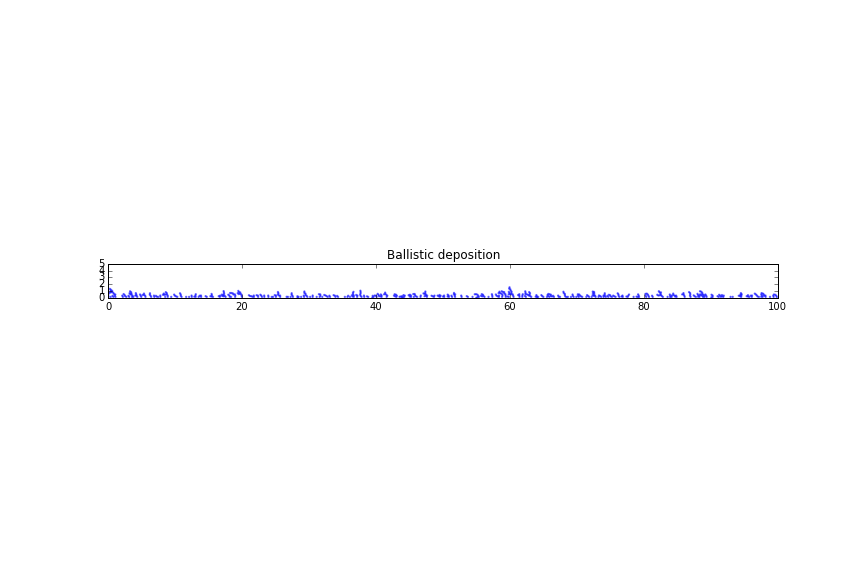

In [7]:
display_plot_widgets()

## Multiple runs to evaluate

Several angles, several lengths, multiple runs, storing deposition results in a JSON file.

JSON keys (in order):
* run_id
* theta
* L
* x,y

In [ ]:
res={}
for run in range(20):
    res[run]={}
    for theta in [20,40,60,70,80,90]:
        clear_output()
        print "run",run,"theta",theta
        res[run][theta]={}
        for L in [10,20,50,100,200]:
            print ("L",L)
            x,y=deposit_particles(theta,50*L,L,1)
            res[run][theta][L]={"x":x.tolist(),"y":y.tolist()}

In [3]:
import ujson

f=open("deposition_results_big.json","w")
f.write(ujson.dumps(res))
f.close()

## Scaling

Loading results from JSON file of the previous section. Calculating values needed for scaling.

In [4]:
import ujson
res2=ujson.loads(open("deposition_results_big.json").read())

%matplotlib inline

# initializing result storing dictionaries
hdict=dict()
wdict=dict()

for theta in res2['0'].keys():
    print theta,":",
    
    hdict[theta]=dict()
    wdict[theta]=dict()
    
    for L in res2["0"]["90"].keys():
        print L,
        h_mean=[]
        w_mean=[]

        # averaging for multiple runs
        for run in res2.keys():
            
            # load coordinates
            x=res2[run][theta][L]['x']
            y=res2[run][theta][L]['y']

            # init measures
            h=[]
            w=[]

            # init envelope
            xe_old,ye_old=create_envelope_selected(x,y,[0],L=int(L))
            h.append(np.mean(ye_old))
            w.append(np.std(ye_old))

            for i in range(1,len(x)):
                # create surface for new particle
                _,ye_new=create_envelope_selected(x,y,[i],L=int(L))
                # intersect old and new surfaces, update old surface if new surface is higher
                ye_old=np.max(array([ye_old,ye_new]),axis=0)

                h.append(np.mean(ye_old))
                w.append(np.std(ye_old))

            h_mean.append(h)
            w_mean.append(w)

        # taking the average over runs
        h_mean=array(h_mean).mean(axis=0)
        w_mean=array(w_mean).mean(axis=0)

        # storing results with given theta and given L
        hdict[theta][L]=h_mean
        wdict[theta][L]=w_mean
        
    print

20 : 200 100 20 50 10
40 : 200 100 20 50 10
60 : 200 100 20 50 10
70 : 200 100 20 50 10
90 : 200 100 20 50 10
80 : 200 100 20 50 10


Plotting scaling results.

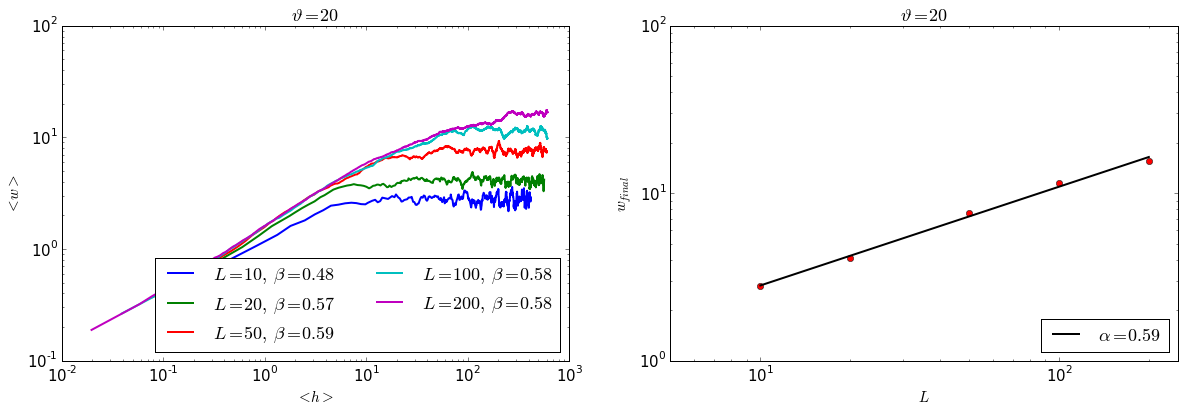

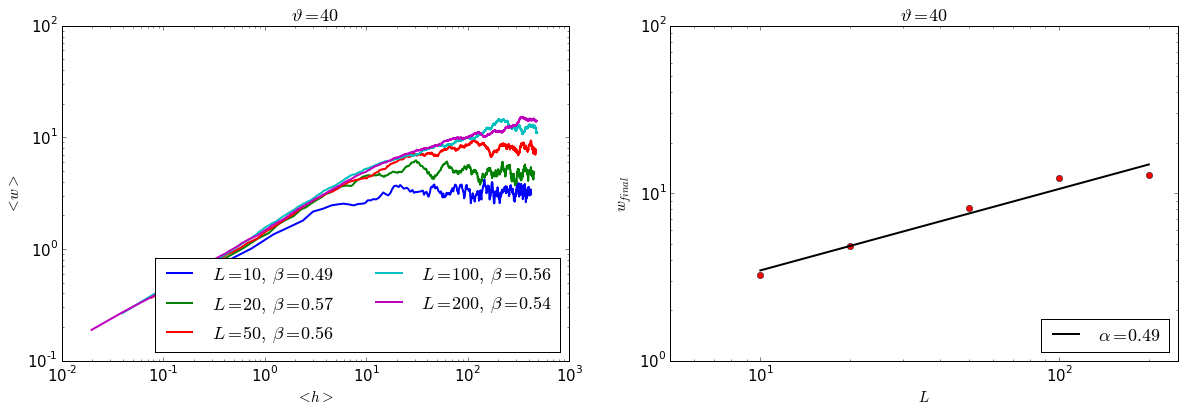

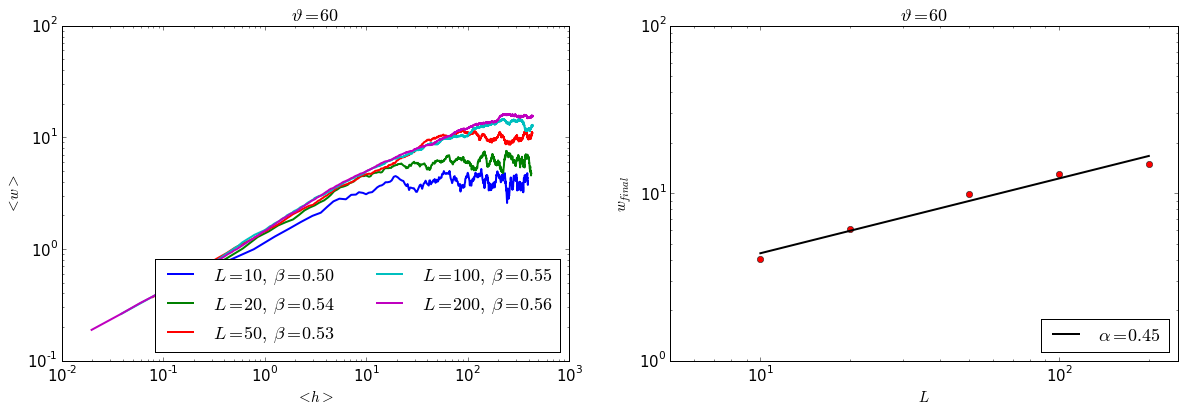

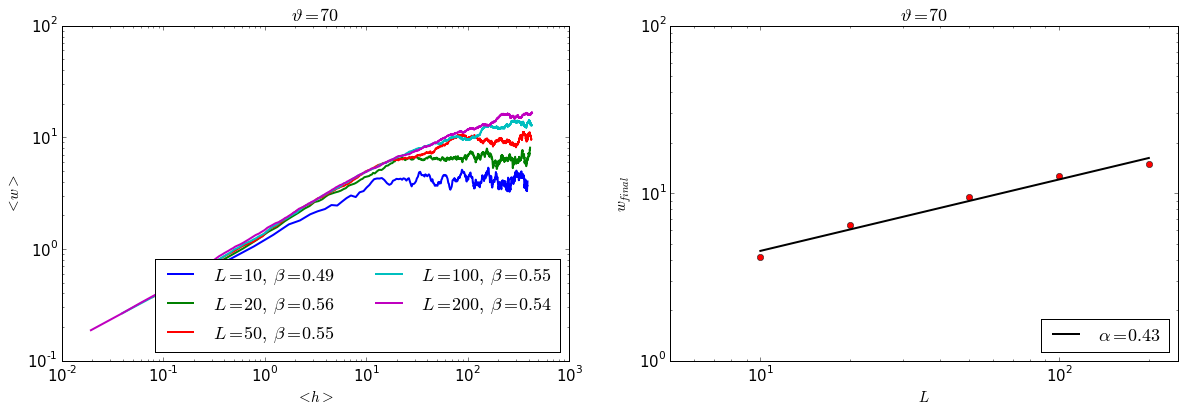

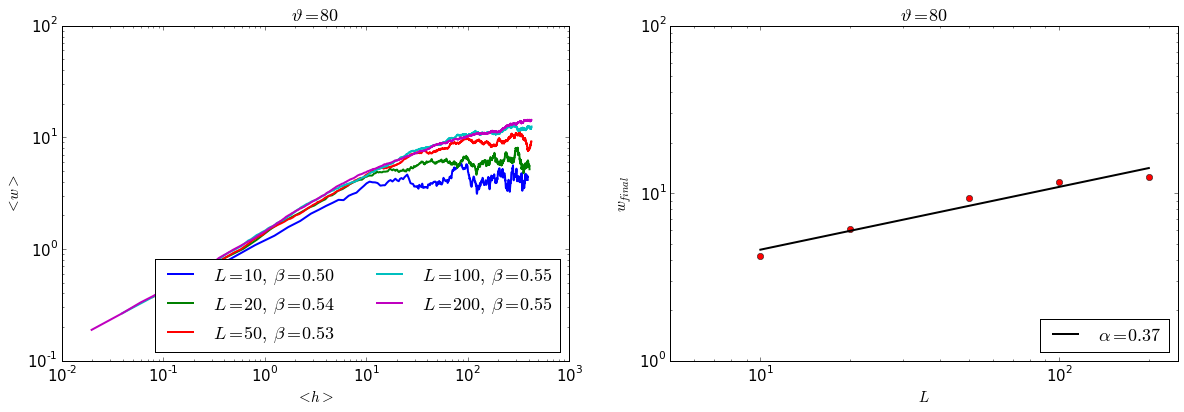

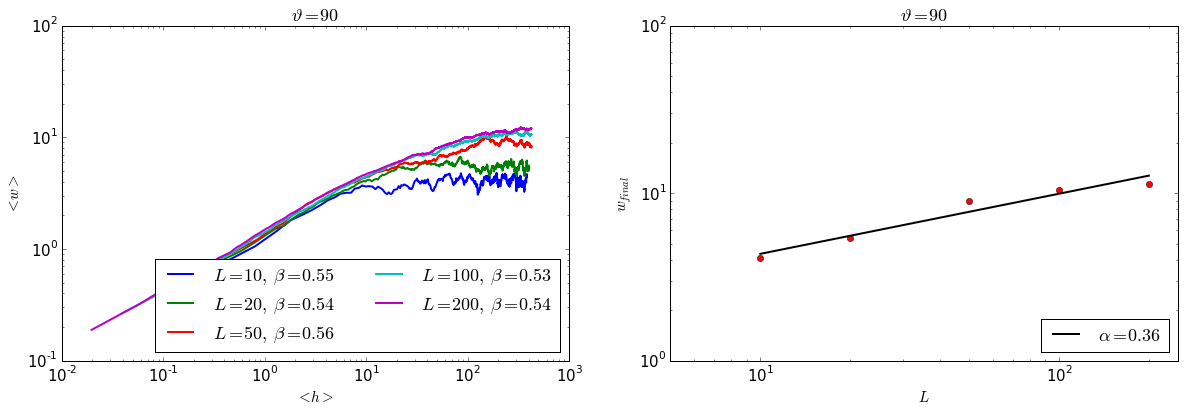

In [5]:
from scipy.optimize import curve_fit

def f(x,a,b):
    return a*x+b

explist=dict()

plt.rcParams["font.size"]=15
Llist=["10","20","50","100","200"]
for theta in ["20","40","60","70","80","90"]:
    explist[theta]=dict()
    explist[theta]["beta"]=[]
    fig,ax=plt.subplots(1,2,figsize=(20,6))
    w_final=[]
    for L in Llist:
        x=hdict[theta][L]
        y=wdict[theta][L]
        m=x<5
        p1,p1_cov=curve_fit(f,np.log(x[m]),np.log(y)[m])
        ax[0].plot(x,y,lw=2,label=r'$L=%.0f,\,\beta=%.2f$' % (int(L),p1[0]))
        w_final.append(np.mean(y[x>350]))
        explist[theta]["beta"].append(p1[0])
        
    ax[0].legend(loc="lower right",ncol=2)
    ax[0].set_xlabel(r"$<h>$")
    ax[0].set_ylabel(r"$<w>$")
    ax[0].set_title(r"$\vartheta=%.0f$" % float(theta))
    ax[0].loglog()
                       
    p2,p2_cov=curve_fit(f,np.log(list(map(int,Llist))),np.log(w_final))
    explist[theta]["alpha"]=p2[0]
    ax[1].plot(list(map(int,Llist)),w_final,'ro')
    ax[1].plot(list(map(int,Llist)),list(map(lambda x: np.exp(p2[0]*np.log(int(x))+p2[1]),Llist)),'k-',lw=2,label=r"$\alpha=%.2f$" % p2[0])
    ax[1].set_xlabel(r"$L$")
    ax[1].set_ylabel(r"$w_{final}$")
    ax[1].set_xlim(5,250)
    ax[1].set_title(r"$\vartheta=%.0f$" % float(theta))
    ax[1].legend(loc="lower right")
    ax[1].loglog()

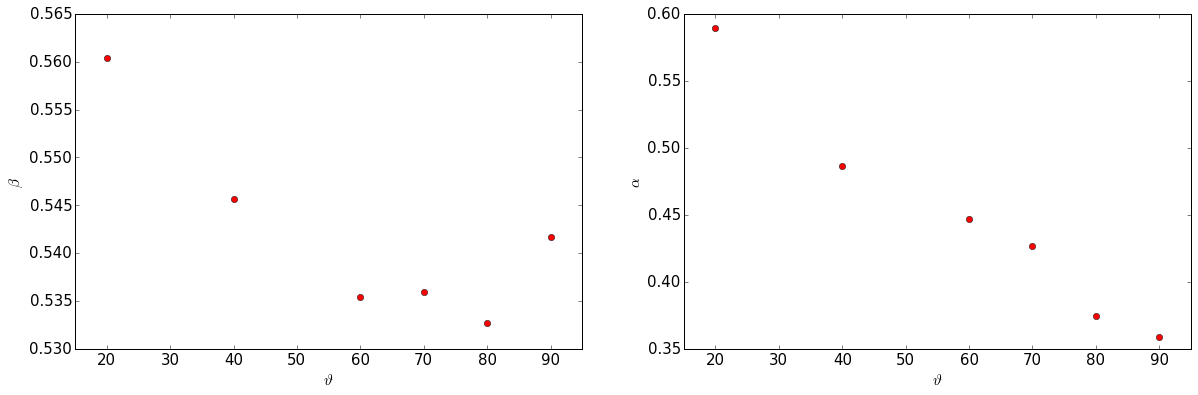

In [6]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
x=explist.keys()
y1=[np.mean(explist[theta]["beta"]) for theta in x]
y2=[explist[theta]["alpha"] for theta in x]

ax[0].plot(x,y1,'ro')
ax[0].set_xlim(15,95)
ax[0].set_xlabel(r"$\vartheta$")
ax[0].set_ylabel(r"$\beta$")

ax[1].plot(x,y2,'ro')
ax[1].set_xlim(15,95)
ax[1].set_xlabel(r"$\vartheta$")
ax[1].set_ylabel(r"$\alpha$")

## Data collapse

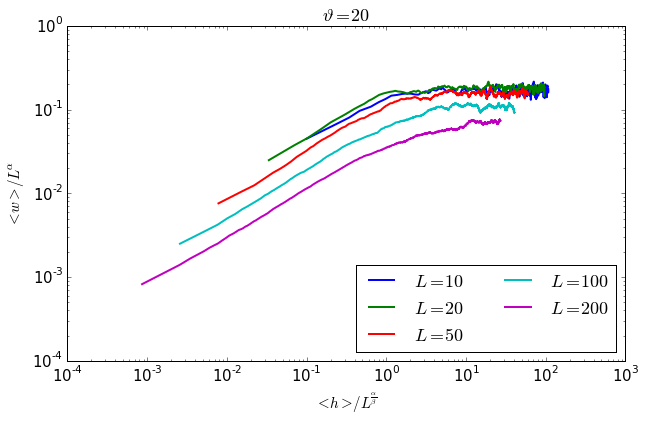

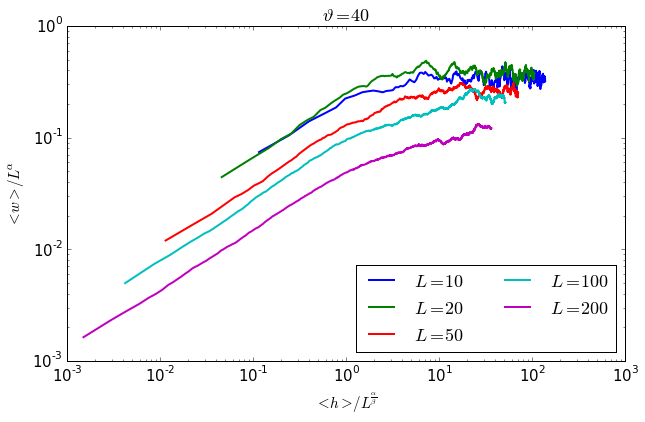

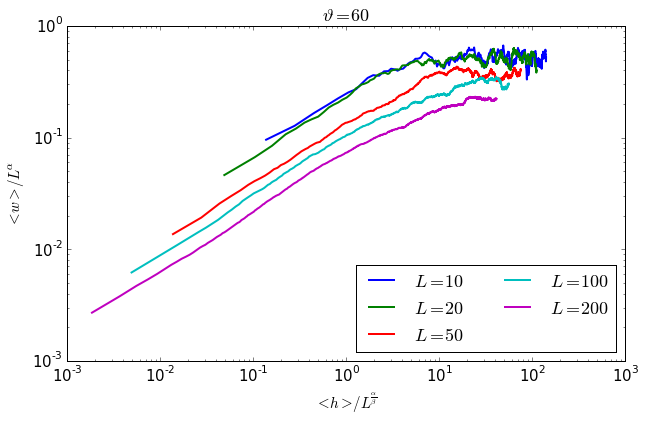

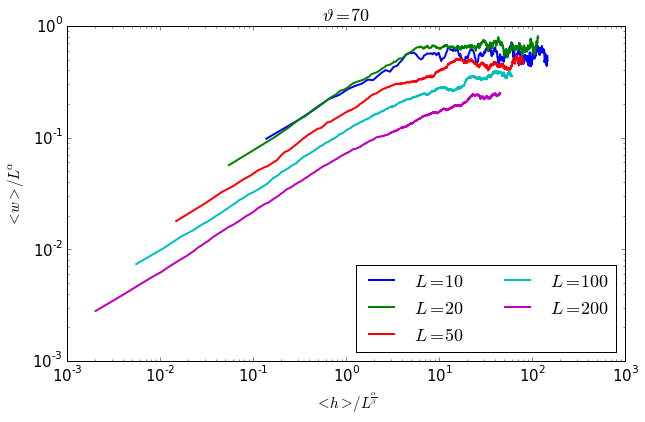

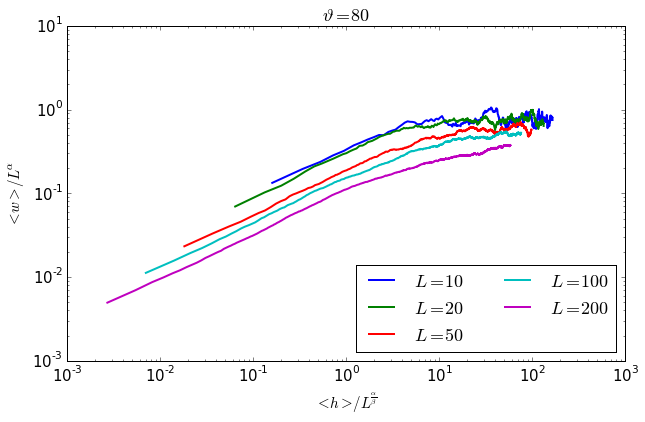

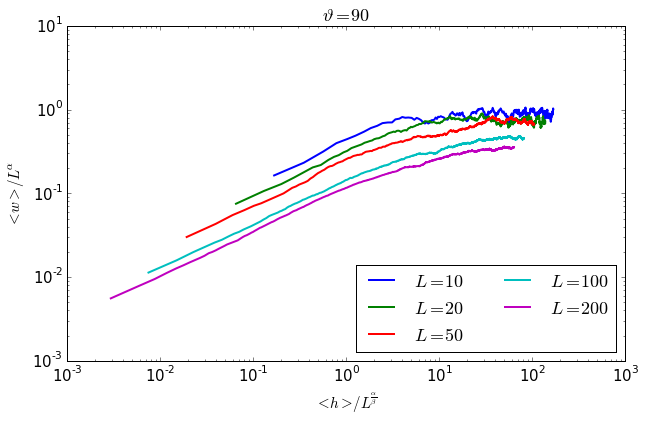

In [7]:
plt.rcParams["font.size"]=15
Llist=["10","20","50","100","200"]

for theta in ["20","40","60","70","80","90"]:
    fig=plt.figure(figsize=(10,6))
    ax=plt.gca()
    for i in range(len(Llist)):
        L=Llist[i]
        x=hdict[theta][L]/(float(L)**explist[theta]["alpha"])
        y=wdict[theta][L]/(float(L)**(explist[theta]["alpha"]/explist[theta]["beta"][i]))
        ax.plot(x,y,lw=2,label=r'$L=%.0f$' % int(L))
        
    ax.legend(loc="lower right",ncol=2)
    ax.set_xlabel(r"$<h>/L^{\frac{\alpha}{\beta}}$")
    ax.set_ylabel(r"$<w>/L^{\alpha}$")
    ax.set_title(r"$\vartheta=%.0f$" % float(theta))
    ax.loglog()